<a href="https://colab.research.google.com/github/andrew623849/AI-/blob/master/IMDb%E7%B6%B2%E8%B7%AF%E9%9B%BB%E5%BD%B1%E8%B3%87%E6%96%99%E9%9B%86%E8%88%87%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib.request
import os
import tarfile
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
  result=urllib.request.urlretrieve(url,filepath)
  print('downloaded:',result)

downloaded: ('aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x7f835fb4ac18>)


In [0]:
if not os.path.exists("aclImdb"):
    tfile=tarfile.open("aclImdb_v1.tar.gz",'r:gz')
    result=tfile.extractall('')

In [0]:
import re
def rm_tag(text):
    re_tag=re.compile(r'<[^>]+>')
    return re_tag.sub('',text)

In [0]:
import os 
def read_files(filetype):
    path="aclImdb/"
    file_list=[]
    
    positive_path=path+filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
        
    negative_path=path+filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
        
    print('read',filetype,'file:',len(file_list))
    
    all_labels=([1]*12500+[0]*12500)
    
    all_texts=[]
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts+=[rm_tag(" ".join(file_input.readlines()))]
        
    return all_labels,all_texts

In [0]:
y_train,train_text=read_files("train")

read train file: 25000


In [0]:
y_test,test_text=read_files("test")

read test file: 25000


In [0]:
train_text[0]

"A series of random, seemingly insignificant thefts at her sister's boarding house has Miss Lemon quite agitated. A ring, light bulbs, a rucksack, a lighter, a stethoscope, a shoe \x96 there seems to be no rhyme or reason to any of it. Miss Lemon asks her employer, the great Belgian detective Hercule Poirot, to look into the matter. But what Poirot sees is something far more sinister than Miss Lemon could have imagined. And Poirot's fears are confirmed when one of the students living in the boarding house if found murdered. It's up to Poirot to bring a killer to justice.Hickory Dickory Dock is a solid, but not spectacular, entry in the long running Poirot series. I appreciate how faithful the script is to Agatha Christie's original story. I realize that certain liberties had to be taken, but I appreciate the effort nonetheless. The major points of the mystery are all there \x96 the petty thefts, the boarding house, the students, the ripped rucksack, and, of course, Poirot's ability to 

In [0]:
y_train[0]

1

In [0]:
train_text[12501]

'Guy de Maupassant was a novelist who wrote a novel about a man, a poor man, without any moral qualities. He only wanted to success in a society where all the people, the politic men, the businessmen, the journalists, the women are corrupt. The only king is MONEY. The Maupassant hero, Charles Forestier is going higher and higher in the society scale thanks to his seduction poser. He is in love with all the women who could help him in his action to climb the society stapes. At the end of the novel, he married himself with the biggest daily paper owner\'s daughter, in the greatest church of Paris : "La Madeleine". "Le Tout Paris" is there. He has a fortune and more, he will become a member of Parliament and later a Minister. The "useless" women are out of his view, but he is always keeping in touch with the pretty and the usefull women. The picture "THE PRIVATE AFFAIRS OF BEL AMI" is a story of MORALITY. It is everything, but not a story in the Maupassant idea. Why had they put "BEL AMI"

In [0]:
y_train[12501]

0

In [0]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
token=Tokenizer(num_words=2000)
token.fit_on_texts(train_text)

In [0]:
print(token.document_count)

25000


In [0]:
print(token.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10, 'that': 11, 'was': 12, 'as': 13, 'for': 14, 'with': 15, 'movie': 16, 'but': 17, 'film': 18, 'on': 19, 'not': 20, 'you': 21, 'are': 22, 'his': 23, 'have': 24, 'be': 25, 'he': 26, 'one': 27, 'all': 28, 'at': 29, 'by': 30, 'an': 31, 'they': 32, 'who': 33, 'so': 34, 'from': 35, 'like': 36, 'her': 37, 'or': 38, 'just': 39, 'about': 40, "it's": 41, 'out': 42, 'has': 43, 'if': 44, 'some': 45, 'there': 46, 'what': 47, 'good': 48, 'more': 49, 'when': 50, 'very': 51, 'up': 52, 'no': 53, 'time': 54, 'she': 55, 'even': 56, 'my': 57, 'would': 58, 'which': 59, 'only': 60, 'story': 61, 'really': 62, 'see': 63, 'their': 64, 'had': 65, 'can': 66, 'were': 67, 'me': 68, 'well': 69, 'than': 70, 'we': 71, 'much': 72, 'been': 73, 'get': 74, 'bad': 75, 'will': 76, 'also': 77, 'do': 78, 'into': 79, 'people': 80, 'other': 81, 'first': 82, 'great': 83, 'because': 84, 'how': 85, 'him': 86, 'most': 87, "don't": 88, 'made

In [0]:
x_train_seq=token.texts_to_sequences(train_text)
x_test_seq=token.texts_to_sequences(test_text)

In [0]:
print(x_train_seq[0])

[3, 197, 4, 1518, 1571, 29, 37, 309, 43, 713, 175, 3, 1739, 633, 3, 3, 3, 3, 471, 46, 182, 5, 25, 53, 38, 279, 5, 97, 4, 8, 713, 1638, 37, 1, 83, 1247, 5, 164, 79, 1, 546, 17, 47, 1078, 6, 138, 226, 49, 70, 713, 96, 24, 2, 22, 50, 27, 4, 1, 1530, 576, 7, 1, 309, 44, 254, 41, 52, 5, 5, 717, 3, 451, 5, 1346, 6, 3, 1151, 17, 20, 7, 1, 192, 616, 197, 9, 1140, 85, 1, 225, 6, 5, 200, 61, 9, 919, 11, 808, 65, 5, 25, 619, 17, 9, 1140, 1, 776, 1, 673, 752, 4, 1, 731, 22, 28, 46, 471, 1, 1, 309, 1, 1530, 1, 2, 4, 260, 1248, 5, 63, 138, 166, 19, 154, 8, 161, 567, 15, 3, 167, 1, 173, 4, 1530, 6, 216, 13, 9, 94, 2, 787, 1, 600, 13, 13, 9, 206, 353, 623, 9, 74, 3, 143, 1970, 42, 4, 1, 668, 15, 2, 713, 10, 386, 6, 3, 143, 1686, 13, 713, 210, 49, 264, 54, 70, 640, 413, 9, 506, 1, 357, 4, 1, 122, 975, 13, 31, 4, 1, 7, 1, 41, 3, 249, 113, 293, 19, 1, 421, 9, 1700, 133, 790, 145, 39, 47, 3, 153, 12, 19, 1, 541, 1116, 731, 104, 38, 4, 1, 2, 189, 1, 584, 4, 13, 31, 456, 44, 21, 67, 5, 52, 1, 872, 4, 1, 132

In [0]:
x_train=sequence.pad_sequences(x_train_seq, maxlen=100)
x_test=sequence.pad_sequences(x_test_seq, maxlen=100)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding

model=Sequential()
model.add(Embedding(output_dim=32,input_dim=2000,input_length=100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1,activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1638912   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,703,425
Trainable params: 1,703,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
train_history=model.fit(x_train,y_train,batch_size=100,epochs=10,verbose=2,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 10s - loss: 0.4710 - acc: 0.7614 - val_loss: 0.5996 - val_acc: 0.7202
Epoch 2/10
 - 9s - loss: 0.2570 - acc: 0.8982 - val_loss: 0.5575 - val_acc: 0.7530
Epoch 3/10
 - 9s - loss: 0.1467 - acc: 0.9447 - val_loss: 0.5411 - val_acc: 0.7980
Epoch 4/10
 - 9s - loss: 0.0736 - acc: 0.9744 - val_loss: 0.9559 - val_acc: 0.7290
Epoch 5/10
 - 9s - loss: 0.0426 - acc: 0.9851 - val_loss: 1.1056 - val_acc: 0.7348
Epoch 6/10
 - 9s - loss: 0.0353 - acc: 0.9872 - val_loss: 1.1842 - val_acc: 0.7524
Epoch 7/10
 - 9s - loss: 0.0355 - acc: 0.9868 - val_loss: 1.3991 - val_acc: 0.7230
Epoch 8/10
 - 9s - loss: 0.0307 - acc: 0.9896 - val_loss: 1.2729 - val_acc: 0.7482
Epoch 9/10
 - 9s - loss: 0.0250 - acc: 0.9910 - val_loss: 1.5090 - val_acc: 0.7244
Epoch 10/10
 - 9s - loss: 0.0195 - acc: 0.9929 - val_loss: 1.5109 - val_acc: 0.7360


In [0]:
scores=model.evaluate(x_test,y_test,verbose=1)
scores[1]

25000/25000 [==============================] - 3s 114us/step


0.80876

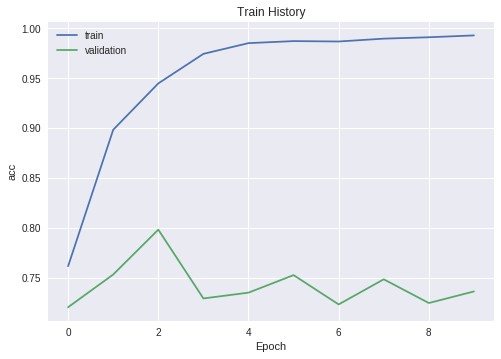

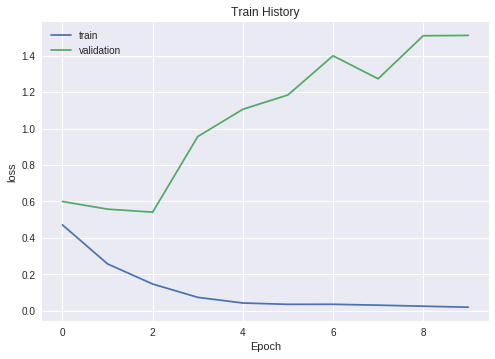

In [0]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [0]:
predict=model.predict_classes(x_test)
predict[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [0]:
predict=predict.reshape(-1)
predict[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
SentimentDict={1:"正面的",0:"負面的"}
def display_test_Sentiment(i):
  print(test_text[i])
  print('label:',SentimentDict[y_test[i]],
       '預測結果:',SentimentDict[predict[i]])

In [0]:
display_test_Sentiment(1)

This is one of the most satisfying of the book to TV adaptations. The actress who make us believe that a Borg could be sexy makes us believe that a spy and traitor can have some redeeming qualities.The TV plot line does not follow Cornwell's story exactly but is both exciting and rewarding as a retelling of a darn good yarn. If you have a yen for romance in uniform there is a lot of sexual energy sparking between our man Sharpe and the lying hussy. Made me wish her role was closer to that in the books. But no matter there is enough hero wronged, hero redeemed, hero in rage, hero in flight and hero in battle to keep you clued to your DVD play.
label: 正面的 預測結果: 正面的


In [0]:
display_test_Sentiment(20)

It resembles so much to movies like PULP FICTION or RESERVOIR DOGS that is impossible to think that Tarantino's films weren't a source of inspiration to this THURSDAY. However for a low cost B-Series movie it's not bad. The plot about gangsters is captivating and funny and it also has a bit of dark humor and sarcasm we can find in PULP FICTION. The resources weren't many fore sure but the film is well produced. The acting also is good. I enjoyed the scene when the girl was sat on the sofa teasing the doctor... It was hot and funny at the same time! The soundtrack is nice too. I didn't hear too many songs but the ones I heard I liked. I score it 7/10.
label: 正面的 預測結果: 正面的


In [0]:
inpute_text='''This film was sumptuously beautiful to look at but the whole way through it I couldn't help thinking how film makers today are cheating with CGI. I firmly believe that part of the magic of cinema is knowing that what is on screen once existed to some degree in reality. Admiring the work of a talented model maker, make-up artist or costume designer is, at least for me, part of wonder. I can see a lot of advantages of computers in cinema but I am really tired of watching films that imitate the magic of talented human beings using silicon chips. Compare the images in this with say Ridley Scott''s Legend (1980). Knowing many ARTISTS were employed to construct the sets, make-up & costumes, etc made for a jaw-droppingly beautiful movie. The movie going experience is not simply watching a moving photograph. It is also an impression of what someone has made &/or done with their own hands & talent. Enough with the CGI please. While I thought this was a very entertaining film, it could have been wonderful (in the true sense of the word) if the makers had not used so much, or any, computer graphics. P.S. I am not a luddite. I simply think cinema is about more than making pretty pictures in a computer. So there!
'''

In [0]:
input_seq=token.texts_to_sequences([inpute_text])
print(input_seq)

[[10, 18, 12, 303, 5, 164, 29, 17, 1, 222, 92, 139, 8, 9, 422, 335, 531, 85, 18, 1183, 636, 22, 15, 1680, 9, 261, 11, 169, 4, 1, 1234, 4, 434, 6, 1272, 11, 47, 6, 19, 264, 276, 5, 45, 7, 631, 1, 153, 4, 3, 1014, 93, 52, 1736, 38, 6, 29, 218, 14, 68, 169, 4, 590, 9, 66, 63, 3, 172, 4, 4, 7, 434, 17, 9, 240, 62, 1453, 4, 145, 104, 11, 1, 1234, 4, 1014, 402, 768, 1652, 1, 1214, 7, 10, 15, 131, 1791, 1272, 107, 67, 5, 1, 727, 93, 52, 1347, 520, 89, 14, 3, 303, 16, 1, 16, 166, 580, 6, 20, 327, 145, 3, 723, 8, 6, 77, 31, 1380, 4, 47, 290, 43, 89, 38, 220, 15, 64, 201, 953, 671, 191, 15, 1, 1680, 588, 133, 9, 193, 10, 12, 3, 51, 438, 18, 8, 96, 24, 73, 385, 7, 1, 278, 277, 4, 1, 678, 44, 1, 1183, 65, 20, 338, 34, 72, 38, 97, 1224, 1684, 586, 9, 240, 20, 3, 9, 327, 100, 434, 6, 40, 49, 70, 227, 180, 1264, 7, 3, 1224, 34, 46]]


In [0]:
len(input_seq[0])

195

In [0]:
pad_input_seq=sequence.pad_sequences(input_seq,maxlen=100)
len(pad_input_seq[0])

100

In [0]:
predict_result=model.predict_classes(pad_input_seq)

In [0]:
predict_result

array([[0]], dtype=int32)

In [0]:
predict_result[0][0]

0

In [0]:
SentimentDict[predict_result[0][0]]

'負面的'

In [0]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
token3800=Tokenizer(num_words=3800)
token3800.fit_on_texts(train_text)

In [0]:
x_train_seq=token3800.texts_to_sequences(train_text)
x_test_seq=token3800.texts_to_sequences(test_text)

In [0]:
x_train=sequence.pad_sequences(x_train_seq,maxlen=380)
x_test=sequence.pad_sequences(x_test_seq,maxlen=380)


In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding

model=Sequential()
model.add(Embedding(output_dim=32,input_dim=3800,input_length=380))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12160)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               6226432   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 6,348,545
Trainable params: 6,348,545
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_train,y_train,batch_size=100,epochs=10,verbose=2,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 37s - loss: 0.4737 - acc: 0.7587 - val_loss: 0.3934 - val_acc: 0.8310
Epoch 2/10
 - 36s - loss: 0.2017 - acc: 0.9230 - val_loss: 0.4124 - val_acc: 0.8294
Epoch 3/10
 - 36s - loss: 0.0860 - acc: 0.9713 - val_loss: 0.7827 - val_acc: 0.7616
Epoch 4/10
 - 36s - loss: 0.0335 - acc: 0.9899 - val_loss: 0.8861 - val_acc: 0.7770
Epoch 5/10
 - 36s - loss: 0.0166 - acc: 0.9958 - val_loss: 0.9542 - val_acc: 0.7912
Epoch 6/10
 - 36s - loss: 0.0117 - acc: 0.9969 - val_loss: 0.7537 - val_acc: 0.8378
Epoch 7/10
 - 36s - loss: 0.0115 - acc: 0.9964 - val_loss: 1.1885 - val_acc: 0.7844
Epoch 8/10
 - 36s - loss: 0.0116 - acc: 0.9959 - val_loss: 1.0004 - val_acc: 0.8148
Epoch 9/10
 - 36s - loss: 0.0145 - acc: 0.9952 - val_loss: 1.1344 - val_acc: 0.8032
Epoch 10/10
 - 36s - loss: 0.0164 - acc: 0.9945 - val_loss: 1.4519 - val_acc: 0.7662


In [0]:
scores=model.evaluate(x_test,y_test,verbose=1)
scores[1]

25000/25000 [==============================] - 11s 435us/step


0.8424